In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Kobe Bryant  shot selection

Cсылка на соревнование: https://www.kaggle.com/c/kobe-bryant-shot-selection

Goal: Fun and education

Using 20 years of data on Kobe's swishes and misses, can you predict which shots will find the bottom of the net? This competition is well suited for practicing classification basics, feature engineering, and time series analysis. Practice got Kobe an eight-figure contract and 5 championship rings. What will it get you?

This data contains the location and circumstances of every field goal attempted by Kobe Bryant took during his 20-year career. Your task is to predict whether the basket went in (shot_made_flag).

We have removed 5000 of the shot_made_flags (represented as missing values in the csv file). These are the test set shots for which you must submit a prediction. You are provided a sample submission file with the correct shot_ids needed for a valid prediction.

In [97]:
data_kobe = pd.read_csv('data/Kobe.csv')

In [202]:
data = data_kobe.dropna()

In [20]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6


In [5]:
target = 'shot_made_flag'

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 25 columns):
action_type           25697 non-null object
combined_shot_type    25697 non-null object
game_event_id         25697 non-null int64
game_id               25697 non-null int64
lat                   25697 non-null float64
loc_x                 25697 non-null int64
loc_y                 25697 non-null int64
lon                   25697 non-null float64
minutes_remaining     25697 non-null int64
period                25697 non-null int64
playoffs              25697 non-null int64
season                25697 non-null object
seconds_remaining     25697 non-null int64
shot_distance         25697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             25697 non-null object
shot_zone_area        25697 non-null object
shot_zone_basic       25697 non-null object
shot_zone_range       25697 non-null object
team_id               25697 non-null int64
team_name         

In [22]:
data.corr()["shot_made_flag"].sort_values()

shot_distance       -0.198242
loc_y               -0.148070
game_event_id       -0.037232
period              -0.032152
shot_id             -0.013016
game_id             -0.001612
playoffs            -0.001257
lon                 -0.000848
loc_x               -0.000848
minutes_remaining    0.028342
seconds_remaining    0.030804
lat                  0.148070
shot_made_flag       1.000000
team_id                   NaN
Name: shot_made_flag, dtype: float64

Особых корреляций между целевой переменной и текущими не наблюдается.

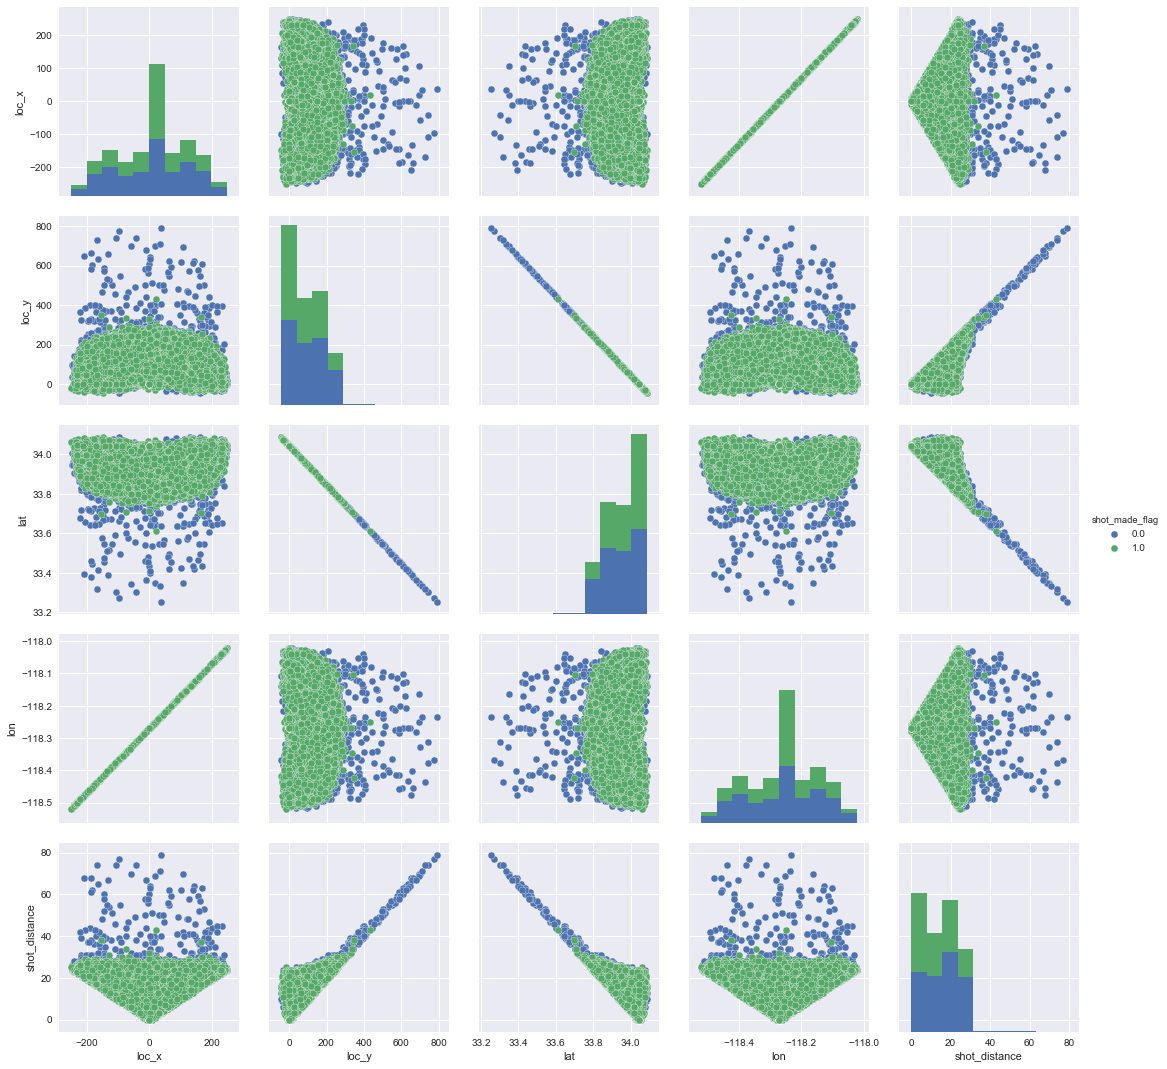

In [190]:
_=sns.pairplot(data, vars=['loc_x','loc_y','lat','lon','shot_distance'],hue='shot_made_flag',size=3)

In [191]:
data.shot_made_flag.value_counts(dropna=False)

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64

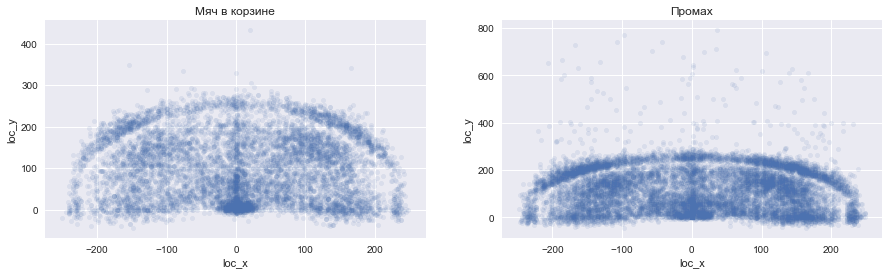

In [192]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_figwidth(15)
_ = data[data.shot_made_flag==1].plot(kind="scatter", x="loc_x", y="loc_y", alpha=0.1,  ax=ax1)
ax1.set_title("Мяч в корзине")
_ = data[data.shot_made_flag==0].plot(kind="scatter", x="loc_x", y="loc_y", alpha=0.1,ax=ax2)
ax2.set_title("Промах")

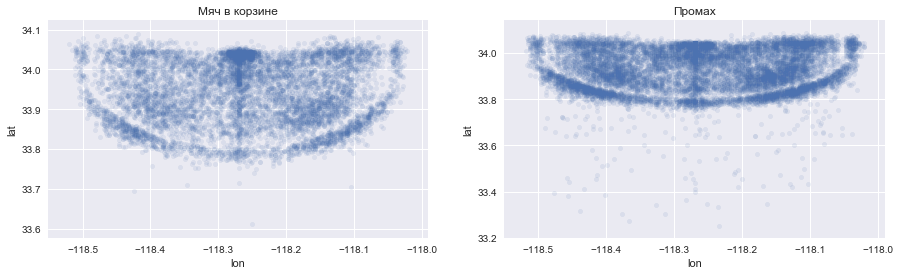

In [193]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_figwidth(15)
_ = data[data.shot_made_flag==1].plot(kind="scatter", x="lon", y="lat", alpha=0.1,  ax=ax1)
ax1.set_title("Мяч в корзине")
_ = data[data.shot_made_flag==0].plot(kind="scatter", x="lon", y="lat", alpha=0.1,ax=ax2)
ax2.set_title("Промах")

Переменные loc_x, loc_y, lon ,lat - характеризуют положения Kobe перед броском на поле, исходя из этих перемнных можно найти угол броска и расстояние до корзины (более точный показатель, чем shot_distance)

In [203]:
data['dist']=np.sqrt(data['loc_x']**2+data['loc_y']**2)
data['angel']=data.apply(lambda row: np.arctan(row.loc_y/row.loc_x) if row.loc_x!=0 else np.pi/2,axis=1)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [195]:
data[['dist','shot_distance']].corr()

,dist,shot_distance
dist,1.0000,0.9995
shot_distance,0.9995,1.0000


Shot_distance мы удалим из набора. У них почти единичная корреляиция с фичей dist (неединичная из-за погрешности измерения)

In [196]:
data.team_name.value_counts()

Los Angeles Lakers    25697
Name: team_name, dtype: int64

In [197]:
data.team_id.value_counts()

1610612747    25697
Name: team_id, dtype: int64

team_id и team_name одинаковые для всего датасета, их можно удалить из данных

In [198]:
data.game_id.value_counts().head()

21501228    43
20601081    41
20500591    39
20200069    39
20700553    37
Name: game_id, dtype: int64

In [41]:
data.opponent.value_counts().head()

SAS    1638
PHX    1535
HOU    1399
SAC    1397
DEN    1352
Name: opponent, dtype: int64

In [79]:
data.matchup.value_counts().head()

LAL @ SAS      853
LAL vs. SAS    765
LAL @ PHX      751
LAL @ SAC      751
LAL vs. HOU    722
Name: matchup, dtype: int64

In [81]:
data[['matchup','opponent']].head(5)

,matchup,opponent
1,LAL @ POR,POR
2,LAL @ POR,POR
3,LAL @ POR,POR
4,LAL @ POR,POR
5,LAL @ POR,POR


Поля matchup и opponent обозначают одно и тоже - команду противника, оставим только поле opponent, т.к. в столбце matchup встречается разичное написание.

In [28]:
data.shot_zone_range.value_counts()

Less Than 8 ft.    7857
16-24 ft.          6907
8-16 ft.           5580
24+ ft.            5281
Back Court Shot      72
Name: shot_zone_range, dtype: int64

In [40]:
data.lon.value_counts().head()

-118.2698    4567
-118.2688     222
-118.1618     129
-118.2718     125
-118.1318     124
Name: lon, dtype: int64

In [30]:
data.shot_zone_area.value_counts(dropna=False)      

Center(C)                11289
Right Side Center(RC)     3981
Right Side(R)             3859
Left Side Center(LC)      3364
Left Side(L)              3132
Back Court(BC)              72
Name: shot_zone_area, dtype: int64

In [215]:
data.groupby("season","game_date_year").value_counts()

ValueError: No axis named game_date_year for object type <class 'pandas.core.frame.DataFrame'>

In [217]:
import datetime
def get_date_year(data_):
    return datetime.datetime.strptime(data_,"%Y-%m-%d").year    
def get_date_month(data_):
    return datetime.datetime.strptime(data_,"%Y-%m-%d").strftime("%B")  

In [218]:
data["game_date_year"],data["game_date_month"] = [data.apply(lambda row: get_date_year(row.game_date),axis=1),
                                                 data.apply(lambda row: get_date_month(row.game_date),axis=1)]

AttributeError: ("'Series' object has no attribute 'game_date'", 'occurred at index 1')

In [205]:
data['times_remainig']=data.apply(lambda row: row.minutes_remaining*60+row.seconds_remaining,axis=1)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


После содания фичи times_remainig(время оставшиеся до конца периода в секундах) мы можем удалить minutes_remaining и seconds_remaining.    
Также удалим технические поля, такие как shot_id,game_event_id,game_id

In [206]:
data.drop(["team_id","team_name","minutes_remaining",
           "seconds_remaining","matchup","shot_id",
           "game_event_id","game_id","game_date","shot_distance","lon","lat","loc_x","loc_y"],axis=1,inplace=True)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 16 columns):
action_type           25697 non-null object
combined_shot_type    25697 non-null object
period                25697 non-null int64
playoffs              25697 non-null int64
season                25697 non-null object
shot_made_flag        25697 non-null float64
shot_type             25697 non-null object
shot_zone_area        25697 non-null object
shot_zone_basic       25697 non-null object
shot_zone_range       25697 non-null object
opponent              25697 non-null object
dist                  25697 non-null float64
angel                 25697 non-null float64
game_date_year        25697 non-null int64
game_date_month       25697 non-null object
times_remainig        25697 non-null int64
dtypes: float64(3), int64(4), object(9)
memory usage: 3.3+ MB


In [77]:
data.period.value_counts()

3    7002
1    6700
4    6043
2    5635
5     280
6      30
7       7
Name: period, dtype: int64

**Задания:**

1. Провести анализ данных. Много хороших примеров анализа можно посмотреть здесь https://www.kaggle.com/c/kobe-bryant-shot-selection/kernels
2. Подготовить фичи для обучения модели - нагенерить признаков, обработать пропущенные значения, проверить на возможные выбросы, обработать категориальные признаки и др.
3. Обучить линейную модель, Lasso, Ridge на тех же признаках - построить сравнительную таблицу коэффициентов, сделать заключения о том, как меняется величина коэффициентов, какие зануляются. Посчитать RSS

**Дополнительно**
4. Сравнить результаты на тестовом наборе данных - сделать train_test_split в самом начале, подготовить переменные, сравнить результаты работы классификаторов (те же 3), метрика ROC AUC